# Modelos de Regresion

### Preparar el entorno y cargar los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Carga del dataset
data_path = "../data/train.csv"
df = pd.read_csv(data_path)

# Preprocesamiento inicial
df['SalePrice_log'] = np.log(df['SalePrice'])

# Eliminamos columnas innecesarias
df.drop(columns=['Id'], inplace=True)

# Manejo de valores nulos basado en el análisis exploratorio
for col in df.select_dtypes(include=['number']).columns:
    df.loc[:, col] = df[col].fillna(df[col].median())  # Numéricas con la mediana

for col in df.select_dtypes(include=['object']).columns:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])  # Categóricas con la moda

# División en conjunto de entrenamiento y prueba
X = df.drop(columns=['SalePrice', 'SalePrice_log'])  # Variables predictoras
y = df['SalePrice_log']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirmación de los tamaños
print(f"Tamaño de X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}, y_test: {y_test.shape}")

Tamaño de X_train: (1168, 79), X_test: (292, 79)
Tamaño de y_train: (1168,), y_test: (292,)


### 7. Modelo univariado de regresión lineal.

In [2]:
from sklearn.linear_model import LinearRegression

# Seleccionar la variable predictora y la variable objetivo
X_uni = X_train[['GrLivArea']]  # Solo usamos GrLivArea como predictor
X_test_uni = X_test[['GrLivArea']]
y = y_train  # SalePrice_log como variable objetivo

# Crear y entrenar el modelo
modelo_uni = LinearRegression()
modelo_uni.fit(X_uni, y)

# Hacer predicciones
y_pred_train = modelo_uni.predict(X_uni)
y_pred_test = modelo_uni.predict(X_test_uni)

# Obtener coeficientes
print(f"Intercepto: {modelo_uni.intercept_}")
print(f"Coeficiente de GrLivArea: {modelo_uni.coef_[0]}")

Intercepto: 11.246804477869594
Coeficiente de GrLivArea: 0.0005131901365587289


In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular métricas de error
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

# Imprimir resultados
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

MAE (Error Absoluto Medio): 0.2144
MSE (Error Cuadrático Medio): 0.0858
RMSE (Raíz del Error Cuadrático Medio): 0.2929
R² (Coeficiente de Determinación): 0.5402


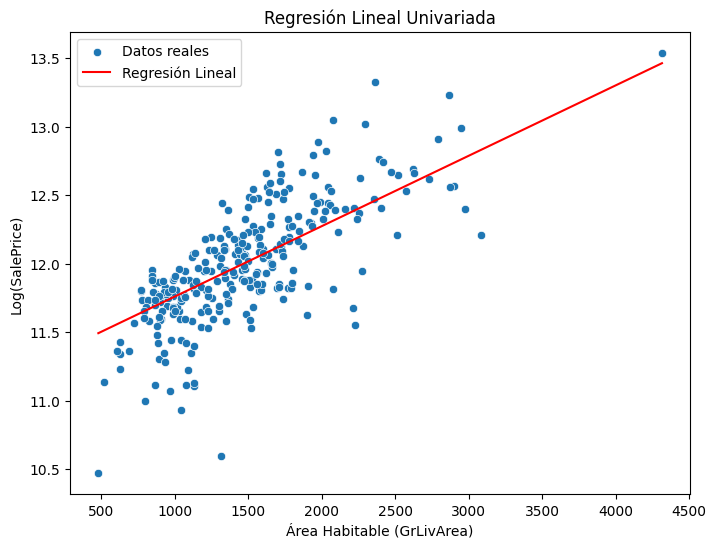

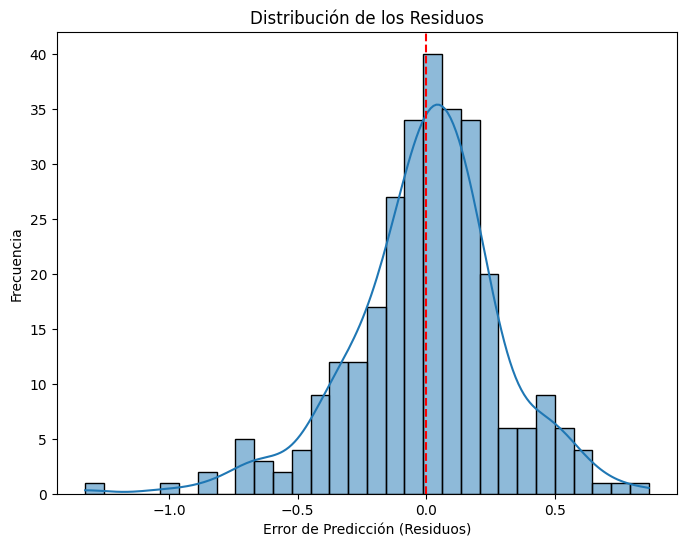

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de la regresión lineal
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['GrLivArea'], y=y_test, label="Datos reales")
sns.lineplot(x=X_test['GrLivArea'], y=y_pred_test, color='red', label="Regresión Lineal")
plt.xlabel("Área Habitable (GrLivArea)")
plt.ylabel("Log(SalePrice)")
plt.title("Regresión Lineal Univariada")
plt.legend()
plt.show()

# Análisis de residuos
residuos = y_test - y_pred_test
plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Error de Predicción (Residuos)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Residuos")
plt.show()

### 8. Modelo Multivariado de Regresión Lineal

In [7]:
import statsmodels.api as sm

# Definir las variables predictoras
features = ['GrLivArea', 'TotalBsmtSF', 'OverallQual', 'GarageCars', 'YearBuilt']

# Seleccionar las variables predictoras y la variable objetivo
X_multi = X_train[features]
X_multi = sm.add_constant(X_multi)  # Agregar constante para el modelo

# Entrenar modelo
modelo_multi = sm.OLS(y_train, X_multi).fit()

# Resumen del modelo
print(modelo_multi.summary())

                            OLS Regression Results                            
Dep. Variable:          SalePrice_log   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     945.7
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        19:32:05   Log-Likelihood:                 389.08
No. Observations:                1168   AIC:                            -766.2
Df Residuals:                    1162   BIC:                            -735.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.1514      0.422     14.565      

MAE (Error Absoluto Medio): 0.1185
MSE (Error Cuadrático Medio): 0.0301
RMSE (Raíz del Error Cuadrático Medio): 0.1734
R² (Coeficiente de Determinación): 0.8027


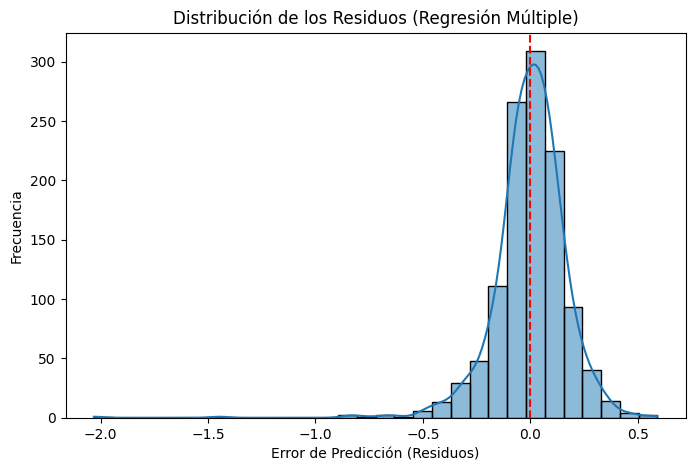

In [8]:
# Predicciones del modelo
y_pred_multi = modelo_multi.predict(X_multi)

# Calcular métricas de error
mae_multi = mean_absolute_error(y_train, y_pred_multi)
mse_multi = mean_squared_error(y_train, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_train, y_pred_multi)

# Mostrar métricas de error
print(f"MAE (Error Absoluto Medio): {mae_multi:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse_multi:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse_multi:.4f}")
print(f"R² (Coeficiente de Determinación): {r2_multi:.4f}")

# Gráfico de residuos
plt.figure(figsize=(8, 5))
sns.histplot(y_train - y_pred_multi, kde=True, bins=30)
plt.axvline(0, color='r', linestyle='dashed')
plt.title("Distribución de los Residuos (Regresión Múltiple)")
plt.xlabel("Error de Predicción (Residuos)")
plt.ylabel("Frecuencia")
plt.show()

In [9]:
# Seleccionar todas las variables numéricas para el modelo
X_train_numeric = X_train.select_dtypes(include=['number']).copy()
X_test_numeric = X_test.select_dtypes(include=['number']).copy()

# Normalizar las variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Convertir a DataFrame y resetear índices
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_numeric.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_numeric.columns, index=X_test.index)

# Agregar constante para la regresión
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Asegurar alineación de índices
y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]

# Entrenar modelo de regresión múltiple
modelo_multi = sm.OLS(y_train, X_train_scaled).fit()

# Resumen del modelo
print(modelo_multi.summary())

# Evaluar el modelo en el conjunto de prueba
y_pred = modelo_multi.predict(X_test_scaled)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

                            OLS Regression Results                            
Dep. Variable:          SalePrice_log   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     211.5
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        19:32:42   Log-Likelihood:                 605.92
No. Observations:                1168   AIC:                            -1142.
Df Residuals:                    1133   BIC:                            -964.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0307      0.004   2811.505

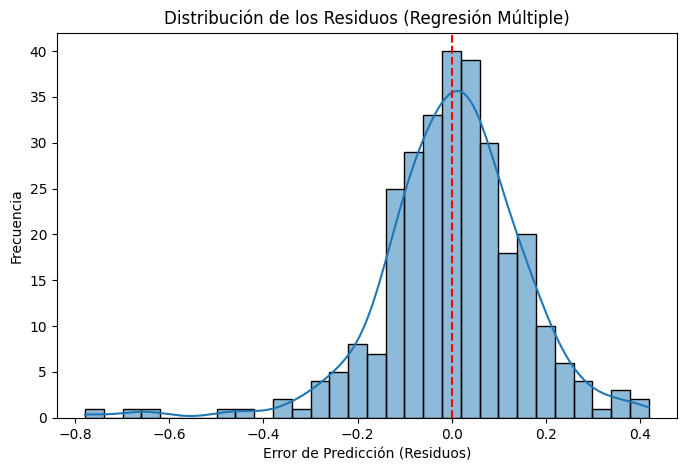

In [10]:
# Calcular residuos
residuos = y_test - modelo_multi.predict(X_test_scaled)

# Histograma de los residuos
plt.figure(figsize=(8, 5))
sns.histplot(residuos, bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='dashed')
plt.xlabel("Error de Predicción (Residuos)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Residuos (Regresión Múltiple)")
plt.show()

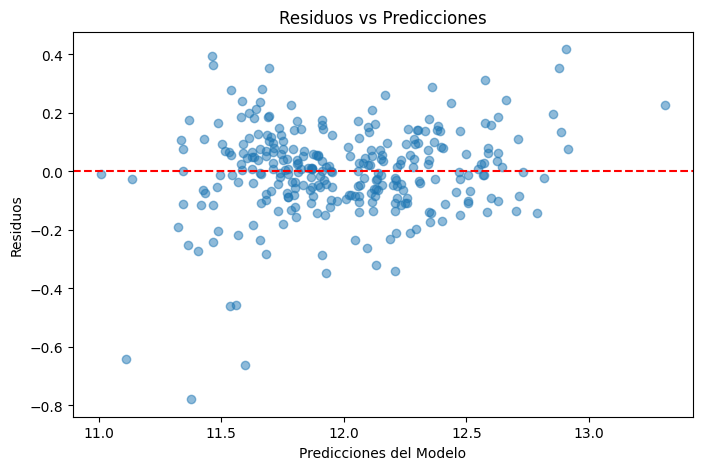

In [11]:
# Gráfico de dispersión de residuos vs predicciones
plt.figure(figsize=(8, 5))
plt.scatter(modelo_multi.predict(X_test_scaled), residuos, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel("Predicciones del Modelo")
plt.ylabel("Residuos")
plt.title("Residuos vs Predicciones")
plt.show()

### 9. Multicolinealidad entre variables

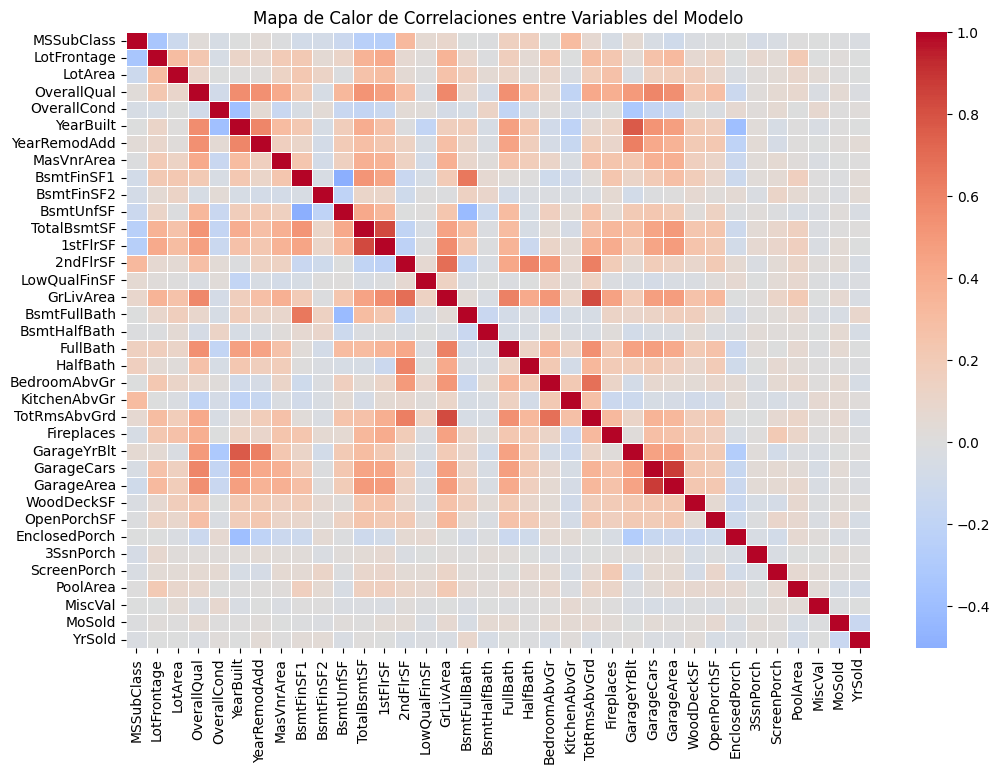

In [5]:
# Filtrar solo columnas numéricas
numeric_features = X_train.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_features.corr(), annot=False, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones entre Variables del Modelo")
plt.show()

In [6]:
# Evaluar el modelo en el conjunto de prueba
y_test_pred = modelo_multi.predict(X_test_scaled)

# Calcular R² en test
r2_test = r2_score(y_test, y_test_pred)

print(f"R² en entrenamiento: {modelo_multi.rsquared:.4f}")
print(f"R² en test: {r2_test:.4f}")

NameError: name 'modelo_multi' is not defined

In [ ]:
from sklearn.linear_model import Ridge

# Entrenar modelo de Ridge con alpha=1.0 (regularización)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Evaluación en test
y_test_pred_ridge = ridge.predict(X_test_scaled)
r2_ridge_test = r2_score(y_test, y_test_pred_ridge)

print(f"R² en test con Ridge: {r2_ridge_test:.4f}")

R² en test con Ridge: 0.8764


Se prueba la regresión Ridge con regularización (alpha=1.0) para corregir posible sobreajuste. Sin embargo, al comparar el R² del modelo original y el modelo Ridge, observamos que los valores son prácticamente iguales.

Esto indica que el modelo original no presenta un sobreajuste significativo, por lo que la regularización no aporta mejoras.

### 11. Evaluación del Modelo en el Conjunto de Prueba

In [ ]:
# Asegurar que X_test_scaled tenga solo las variables seleccionadas por el modelo
X_test_selected = X_test_scaled[["GrLivArea", "TotalBsmtSF", "OverallQual", "GarageCars", "YearBuilt"]]

# Agregar constante, igual que en el entrenamiento del modelo seleccionado
X_test_selected = sm.add_constant(X_test_selected)

# Ahora hacer la predicción con el modelo seleccionado
y_pred_selected = modelo_selected.predict(X_test_selected)

In [ ]:
# Importar métricas de evaluación
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from IPython.display import display 

# Función para calcular métricas
def evaluar_modelo(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Evaluar ambos modelos
# Evaluar ambos modelos
mae_selected, mse_selected, rmse_selected, r2_selected = evaluar_modelo(y_test, y_pred_selected)
mae_lasso, mse_lasso, rmse_lasso, r2_lasso = evaluar_modelo(y_test, y_test_pred_lasso)

# Crear tabla comparativa
resultados = pd.DataFrame({
    "Modelo": ["Selección Manual", "Lasso"],
    "MAE": [mae_selected, mae_lasso],
    "MSE": [mse_selected, mse_lasso],
    "RMSE": [rmse_selected, rmse_lasso],
    "R²": [r2_selected, r2_lasso]
})

# Mostrar la tabla con resultados
display(resultados)

,Modelo,MAE,MSE,RMSE,R²
0,Selección Manual,0.121255,0.030238,0.173891,0.837965
1,Lasso,0.171091,0.057949,0.240726,0.689470
